# Setup

In [ ]:
%pip install -q huggingface-hub plotly

In [ ]:
from huggingface_hub import login

login()

# Create Plot

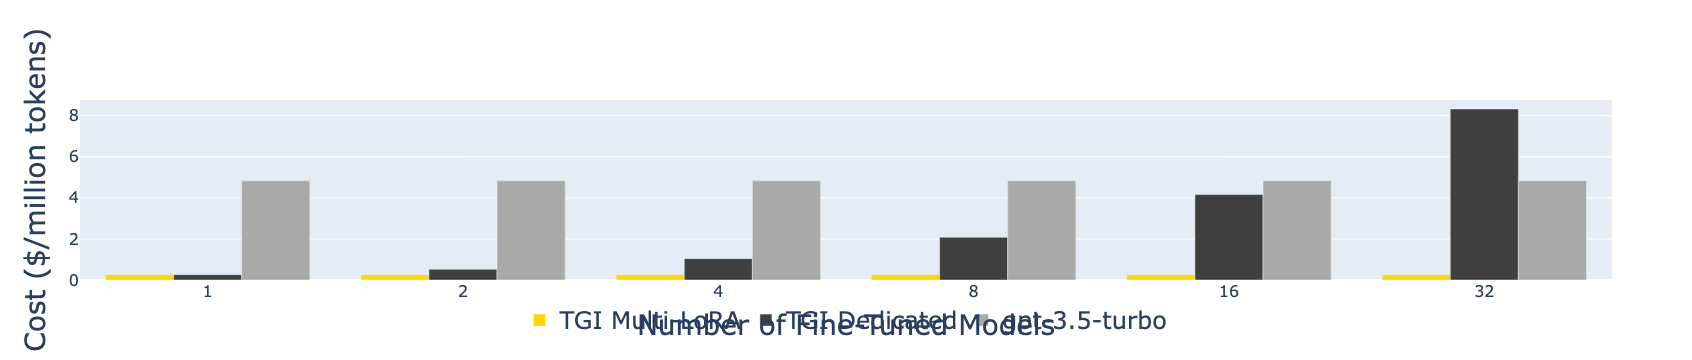

In [36]:
import plotly.graph_objects as go

# Updated data
number_of_models = ["1", "2", "4", "8", "16", "32"]
tgi_multilora = [0.26, 0.26, 0.26, 0.26, 0.26, 0.26]
tgi_dedicated = [0.26, 0.52, 1.04, 2.08, 4.16, 8.33]
gpt_3_5_turbo = [4.83, 4.83, 4.83, 4.83, 4.83, 4.83]

# Create traces
fig = go.Figure()
fig.add_trace(go.Bar(x=number_of_models, y=tgi_multilora, name='TGI Multi-LoRA', marker_color='rgb(255, 215, 0)'))  # Golden color
fig.add_trace(go.Bar(x=number_of_models, y=tgi_dedicated, name='TGI Dedicated', marker_color='rgb(64, 64, 64)'))  # Dark grey
fig.add_trace(go.Bar(x=number_of_models, y=gpt_3_5_turbo, name='gpt-3.5-turbo', marker_color='rgb(169, 169, 169)'))  # Grey

# Layout settings with larger text sizes
fig.update_layout(
    # title='Cost per Million Tokens by Model Configuration',
    title_font_size=24,  # Larger title font size
    xaxis_title='Number of Fine-Tuned Models',
    yaxis_title='Cost ($/million tokens)',
    xaxis=dict(
        type='category',
        title_font_size=28,  # Larger axis title font size
        tickfont_size=16  # Larger tick label font size
    ),
    yaxis=dict(
        title_font_size=28,  # Larger axis title font size
        tickfont_size=16  # Larger tick label font size
    ),
    legend=dict(
        x=0.5,  # Horizontal position, 0 is left
        y=-0.1,
        # y=-0.3,  # Vertical position, negative values to move it down
        orientation="h",  # Horizontal layout
        xanchor='center',  # Anchor the legend at the left
        yanchor='top'  # Anchor the legend at the top
    ),
    barmode='group',
    # legend_title_text='Model',
    legend_title_font_size=28,  # Larger legend title font size
    legend_font_size=24  # Larger legend font size
)



# Push Image

In [41]:
# Set the size for 16:9 aspect ratio and save as PNG
image_out = "multi-lora-cost.png"
fig.write_image(image_out, width=1920, height=1080, scale=2)

In [42]:
from huggingface_hub import HfApi

commit_message_image = input()
api = HfApi()
api.upload_file(
    path_or_fileobj=image_out,
    path_in_repo=f"blog/multi-lora-serving/{image_out}",
    repo_id="huggingface/documentation-images",
    repo_type="dataset",
    commit_message=commit_message_image,
)

 Cleaning up notebook


CommitInfo(commit_url='https://huggingface.co/datasets/huggingface/documentation-images/commit/d6302d45be5810016615dc065b07f244a6f94f98', commit_message='Cleaning up notebook', commit_description='', oid='d6302d45be5810016615dc065b07f244a6f94f98', pr_url=None, pr_revision=None, pr_num=None)

# Push Notebook

In [ ]:
from huggingface_hub import HfApi

notebook = "multi-lora-cost.ipynb"
commit_message_notebook = input()

api = HfApi()
api.upload_file(
    path_or_fileobj=notebook,
    path_in_repo=f"blog/multi-lora-serving/{notebook}",
    repo_id="huggingface/documentation-images",
    repo_type="dataset",
    commit_message=commit_message_notebook,
)